# Using PyKrige library for kriging interpolation 
## Ordinary kriging


In [ ]:
#%pip install pykrige
import pandas as pd
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt



# Load data from CSV separated by ;
#data = pd.read_csv('Datasets/Alaska/elevp.csv', sep=';')  # Ensure your CSV has columns named 'X', 'Y', 'ELEV'
data = pd.read_csv('data = pd.read_csv('Datasets/Alaska/elevp.csv', sep=';') 
x = data['X']
y = data['Y']
z = data['ELEV']

#Load the shapefile (boundary of Alaska) - OPTIONAL
import geopandas as gpd
#alaskaboundary = gpd.read_file('Datasets/Alaska/AlaskaBoundaryST2.gpkg')
alaskaboundary = gpd.read_file('https://github.com/geoUFSC/geostats/blob/main/data/Alaska/AlaskaBoundaryST2.gpkg')

# Create grid points for interpolation
gridx = np.linspace(x.min(), x.max()+500000, 100)
gridy = np.linspace(y.min()-1300000, y.max()+100000, 100)
gridx, gridy = np.meshgrid(gridx, gridy)


# Perform Ordinary Kriging
OK = OrdinaryKriging(x, y, z, variogram_model='linear', verbose=False, enable_plotting=False)
z_interp, ss = OK.execute('grid', gridx[0], gridy[:,0])

'''
OK = OrdinaryKriging(
    x, y, z,
    variogram_model='linear',
    variogram_parameters={'slope': 0.247, 'nugget': 1321873},
    verbose=True,
    enable_plotting=True
)
'''

"\nOK = OrdinaryKriging(\n    x, y, z,\n    variogram_model='linear',\n    variogram_parameters={'slope': 0.247, 'nugget': 1321873},\n    verbose=True,\n    enable_plotting=True\n)\n"

C:\Users\steph\AppData\Local\Temp\ipykernel_22124\3448093916.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax1.legend()


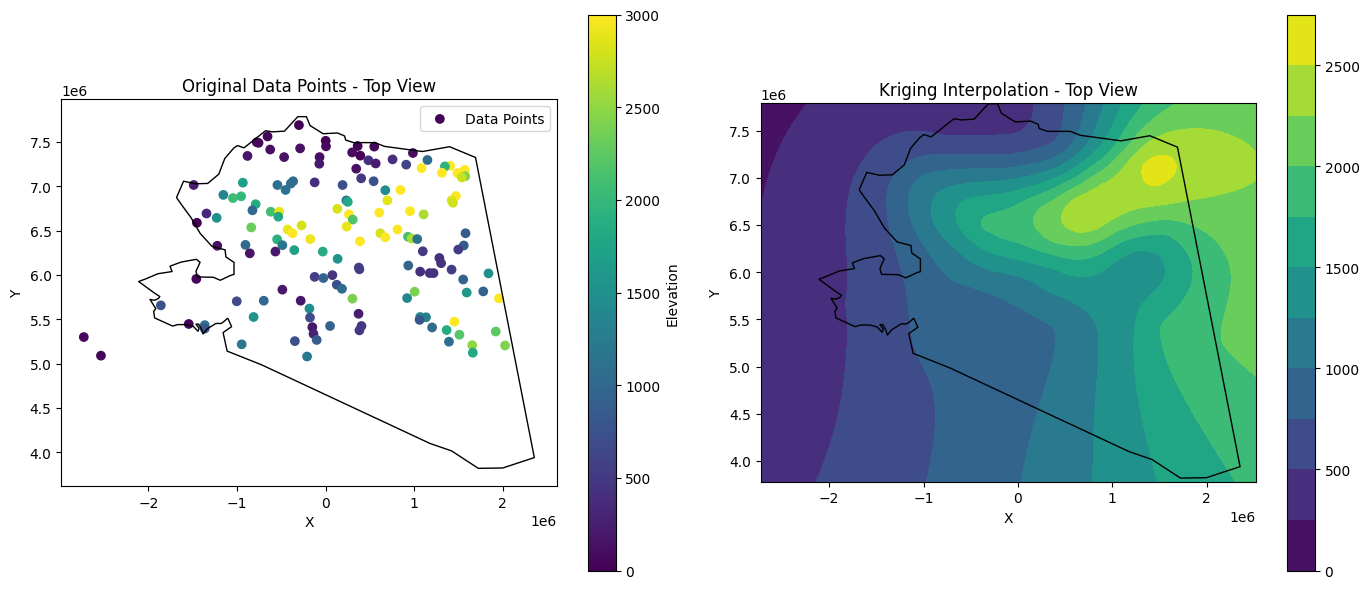

In [ ]:
# Plot the results

# Top view of the original data points and kriging interpolation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Original data points - scatter plot
sc = ax1.scatter(x, y, c=z, cmap='viridis', marker='o', label='Data Points')
fig.colorbar(sc, ax=ax1, label='Elevation')
sc.set_clim(0, 3000)
alaskaboundary.plot(ax=ax1, facecolor='none', edgecolor='black', linewidth=1, label='Alaska Boundary')
ax1.set_title('Original Data Points - Top View')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
# Kriging interpolation - contour plot
c = ax2.contourf(gridx, gridy, z_interp, cmap='viridis', levels=10)
fig.colorbar(c, ax=ax2)
alaskaboundary.plot(ax=ax2, facecolor='none', edgecolor='black', linewidth=1)
ax2.set_title('Kriging Interpolation - Top View')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
plt.tight_layout()
plt.show()



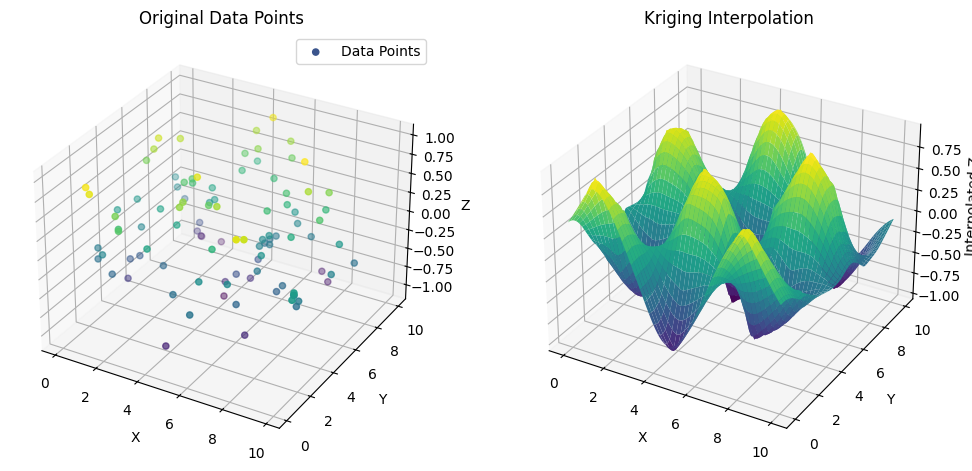

In [91]:
#Synthetic data example

#pip install pykrige
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data
np.random.seed(0)
n = 100
x = np.random.uniform(0, 10, n)
y = np.random.uniform(0, 10, n)
z = np.sin(x) * np.cos(y) + np.random.normal(0, 0.1, n)
# Create grid points for interpolation
gridx = np.linspace(0, 10, 100)
gridy = np.linspace(0, 10, 100)
gridx, gridy = np.meshgrid(gridx, gridy)

# Perform Ordinary Kriging
OK = OrdinaryKriging(x, y, z, variogram_model='spherical', verbose=False, enable_plotting=False)
z_interp, ss = OK.execute('grid', gridx[0], gridy[:,0])

# Plot synthetic data results
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o', label='Data Points')
#fig.colorbar(sc, ax=ax, label='synthetic data values')
ax.set_title('Original Data Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(gridx, gridy, z_interp, cmap='viridis', edgecolor='none')
ax2.set_title('Kriging Interpolation')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Interpolated Z')
plt.show()
